<div style="background-color: rgb(230, 216, 173); padding: 10px; height: 70px; border-radius: 15px;">
    <div style="font-family: 'Georgia', serif; font-size: 20px; padding: 10px; text-align: right; position: absolute; right: 50px;">
        Neel Adalja <br>
        <span style="font-family: 'Arial', sans-serif;font-size: 12px; color: #0a0a0a;">Data Scientist</span>
    </div>
</div>

<div style="background-color: rgb(30, 69, 197); text-align: center; color: white; font-size: 32px; font-family: 'Arial', sans-serif; border-radius: 100px;">
    Customer Churn Prediction <br>
    <h3 style="text-align: center; color: white; font-size: 15px; font-family: 'Arial', sans-serif;"></h3>
</div


<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3> PROJECT DESCRIPTION 
</h3> </div>

- In the context of the Churn dataset, the churn label indicates whether a customer has churned or not. A churned customer is one who has decided to discontinue their subscription or usage of the company's services. On the other hand, a non-churned customer is one who continues to remain engaged and retains their relationship with the company.
    - CustomerID: Id of the customers(not required)
    - Age: Age of the Customers
    - Gender: Gender (Male/Female)
    - Tenure: Holding oft the service using
    - Usage Frequency: How frequent the Servie is being used. 
    - Support Calls: Number of calls made to the support.
    - Payment Delay: Payment delays in days(number)
    - Subscription Type: Type of Subscriuption
    - Contract Length: length of the contract(object)
    - Total Spend: total amount of money spent
    - Last Interaction: days until last interaction was made. 
    - Churn: The 1 meaning custoner is churned, 0 means Customer is not chruned.
- Train Dataset Shape: (440833, 12)
- Test Dataset Shape:  (64374, 12)

In [35]:
#importing required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [36]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from lazypredict.Supervised import LazyClassifier

In [37]:
#importing the CSV files from local directory. Test and Train Files. 
train = pd.read_csv('./customer_churn_dataset-training-master.csv')
test = pd.read_csv('./customer_churn_dataset-testing-master.csv')

In [38]:
train.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.00,30.00,Female,39.00,14.00,5.00,18.00,Standard,Annual,932.00,17.00,1.00
1,3.00,65.00,Female,49.00,1.00,10.00,8.00,Basic,Monthly,557.00,6.00,1.00
2,4.00,55.00,Female,14.00,4.00,6.00,18.00,Basic,Quarterly,185.00,3.00,1.00
3,5.00,58.00,Male,38.00,21.00,7.00,7.00,Standard,Monthly,396.00,29.00,1.00
4,6.00,23.00,Male,32.00,20.00,5.00,8.00,Basic,Monthly,617.00,20.00,1.00
5,8.00,51.00,Male,33.00,25.00,9.00,26.00,Premium,Annual,129.00,8.00,1.00
6,9.00,58.00,Female,49.00,12.00,3.00,16.00,Standard,Quarterly,821.00,24.00,1.00
7,10.00,55.00,Female,37.00,8.00,4.00,15.00,Premium,Annual,445.00,30.00,1.00
8,11.00,39.00,Male,12.00,5.00,7.00,4.00,Standard,Quarterly,969.00,13.00,1.00
9,12.00,64.00,Female,3.00,25.00,2.00,11.00,Standard,Quarterly,415.00,29.00,1.00


In [39]:
test.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
6,7,47,Female,37,15,9,28,Basic,Quarterly,574,14,1
7,8,54,Female,36,11,0,18,Standard,Monthly,323,16,0
8,9,36,Male,20,5,10,8,Basic,Monthly,687,8,0
9,10,65,Male,8,4,2,23,Basic,Annual,995,10,0


In [40]:
train.shape

(440833, 12)

In [41]:
test.shape

(64374, 12)

In [42]:
train.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [43]:
test.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


## Features and types. 
- The Train Dataset has numerical features that are float, but are actually integers. so need to be converted. 
- There are 3 categorical features. we will be label encoding them since label encoding is better for tree structure algorithms. 

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


## For Test Dataset
- The numerical Features are all integers.
- There are 3 features that are objects.
- Will have to remove the Churn Column since its the one we are predicting. 

In [48]:
train.isnull().sum() # checking fir null values

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [49]:
#identyfiyng the row that has null values. 
null_rows_train = train[train.isnull().any(axis=1)]
print(null_rows_train)

        CustomerID  Age Gender  Tenure  Usage Frequency  Support Calls  \
199295         NaN  NaN    NaN     NaN              NaN            NaN   

        Payment Delay Subscription Type Contract Length  Total Spend  \
199295            NaN               NaN             NaN          NaN   

        Last Interaction  Churn  
199295               NaN    NaN  


In [50]:
#dropping the null value
train = train.dropna()

In [51]:
#checking if there are any more null values. 
train.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [52]:
#looking for null vaues in the test dataset. 
test.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [53]:
# Now we will convert the features from train that are float to integers.
numerical_features = ['CustomerID', 'Age', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']
categorical_features = ['Gender', 'Subscription Type', 'Contract Length']

train[numerical_features] = train[numerical_features].astype(int)

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   CustomerID         440832 non-null  int64 
 1   Age                440832 non-null  int64 
 2   Gender             440832 non-null  object
 3   Tenure             440832 non-null  int64 
 4   Usage Frequency    440832 non-null  int64 
 5   Support Calls      440832 non-null  int64 
 6   Payment Delay      440832 non-null  int64 
 7   Subscription Type  440832 non-null  object
 8   Contract Length    440832 non-null  object
 9   Total Spend        440832 non-null  int64 
 10  Last Interaction   440832 non-null  int64 
 11  Churn              440832 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 43.7+ MB


## EDA

In [55]:
train.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.00,440832.00,440832.00,440832.00,440832.00,440832.00,440832.00,440832.00,440832.00
mean,225398.67,39.37,31.26,15.81,3.60,12.97,631.34,14.48,0.57
std,129531.92,12.44,17.26,8.59,3.07,8.26,240.72,8.60,0.50
min,2.00,18.00,1.00,1.00,0.00,0.00,100.00,1.00,0.00
25%,113621.75,29.00,16.00,9.00,1.00,6.00,480.00,7.00,0.00
50%,226125.50,39.00,32.00,16.00,3.00,12.00,661.00,14.00,1.00
75%,337739.25,48.00,46.00,23.00,6.00,19.00,830.00,22.00,1.00
max,449999.00,65.00,60.00,30.00,10.00,30.00,1000.00,30.00,1.00


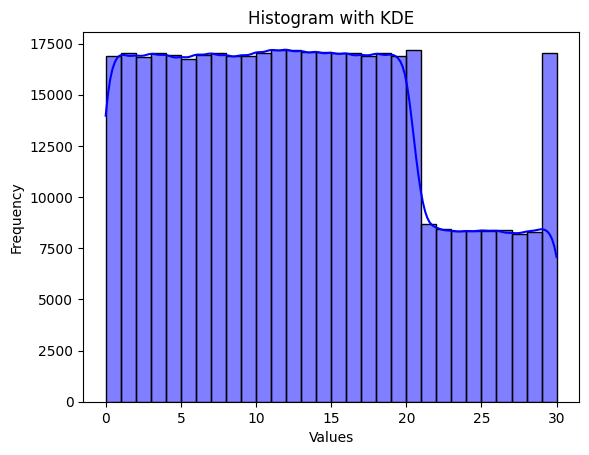

In [56]:
#we will now check the distributioin of the data
data = train['Payment Delay']

# Plot histogram with KDE
sns.histplot(data, kde=True, bins=30, color='blue')

# Add labels and title
plt.title('Histogram with KDE')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

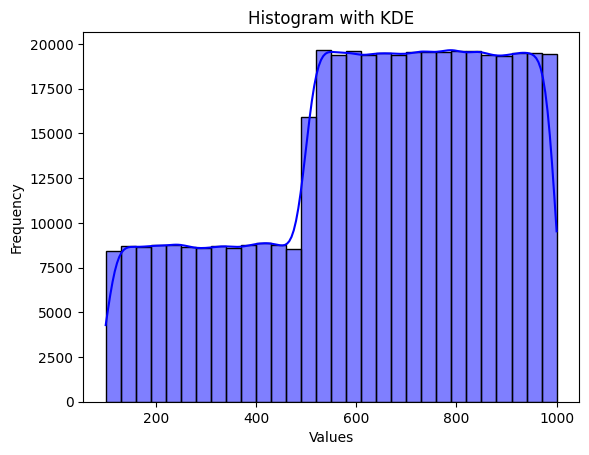

In [57]:
data = train['Total Spend']

# Plot histogram with KDE
sns.histplot(data, kde=True, bins=30, color='blue')

# Add labels and title
plt.title('Histogram with KDE')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

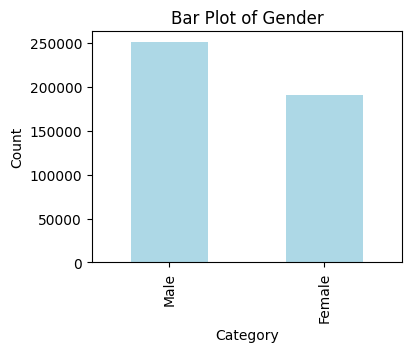

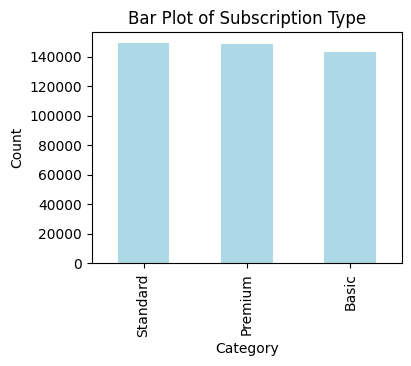

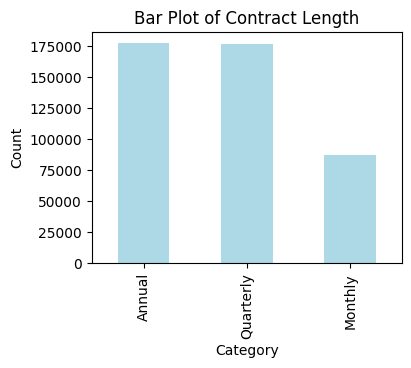

In [58]:
for col in categorical_features:
    plt.figure(figsize=(4, 3))
    train[col].value_counts().plot(kind='bar', color='lightblue')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()

In [59]:
print(train['Gender'].value_counts())

Gender
Male      250252
Female    190580
Name: count, dtype: int64


In [60]:
print(train['Subscription Type'].value_counts())

Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64


In [61]:
print(train['Contract Length'].value_counts())

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64


In [62]:
train = train.drop(columns=['CustomerID'])
test = test.drop(columns=['CustomerID', 'Churn']) 

## Feature Transforming

In [63]:
label_encoder = LabelEncoder()

# Apply label encoding to 'Gender'
train['Gender'] = label_encoder.fit_transform(train['Gender'])
test['Gender'] = label_encoder.transform(test['Gender'])


In [64]:
# using 1 hot encoding here because it is good for nominal data. 
train = pd.get_dummies(train, columns=['Subscription Type', 'Contract Length'], drop_first=True)
test = pd.get_dummies(test, columns=['Subscription Type', 'Contract Length'], drop_first=True)

In [65]:
train.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn',
       'Subscription Type_Premium', 'Subscription Type_Standard',
       'Contract Length_Monthly', 'Contract Length_Quarterly'],
      dtype='object')

In [66]:
test.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend', 'Last Interaction',
       'Subscription Type_Premium', 'Subscription Type_Standard',
       'Contract Length_Monthly', 'Contract Length_Quarterly'],
      dtype='object')

## Feature Scaling 

In [67]:
# Initialize the scaler
scaler = StandardScaler()

# Columns to scale
numerical_columns = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

# Fit and transform the scaler on the training data and transform the test data
train[numerical_columns] = scaler.fit_transform(train[numerical_columns])
test[numerical_columns] = scaler.transform(test[numerical_columns])

## Modeling

In [68]:
#making copies to use in different algorithms. 
train1 = train.copy()
test1 = test.copy()

In [69]:
y_test = test
X_train, X_val, y_train, y_val = train_test_split(train.drop(columns=['Churn']), train['Churn'], test_size=0.2, random_state=42)

In [70]:
# Initialize the classifier
classifier = LogisticRegression()

# Train the model
classifier.fit(X_train, y_train)

LogisticRegression()

In [71]:
# Predict on validation data
y_pred = classifier.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8964


In [72]:
y_test_pred = classifier.predict(test)

In [73]:
output = pd.DataFrame({
    'Customer_ID': test.index,  # Using index as a placeholder for Customer_ID
    'Churn_Prediction': y_test_pred
})

# Save to CSV
output.to_csv('churn_predictions.csv', index=False)